In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../dataset/sentiment_analysis.csv')
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data preprocessing

In [3]:
data.shape


(7920, 3)

In [4]:
data.duplicated().sum()


0

In [5]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## text preprocessing

In [6]:
import re
import string

convert to lowercase

In [7]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

remove links

In [8]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','', x, flags=re.MULTILINE) for x in x.split()))

In [9]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove punctuations

In [10]:
def remove_p(text):
    for punctuation in string.punctuation:
        text=text.replace(punctuation,'')
    return text
data["tweet"]=data["tweet"].apply(remove_p)

In [11]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove numbers

In [12]:
data["tweet"]=data['tweet'].str.replace(r'\d+', '', regex=True)

In [13]:
data["tweet"].tail(10)


7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [14]:
!pip install nltk

In [15]:
import nltk

In [16]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
with open('../static/model/corpora/stopwords/english', 'r')as file:
    stopw=file.read().splitlines()

In [18]:
stopw


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
data["tweet"]=data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in stopw)) 

In [20]:
data["tweet"].head(10)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
5    iphone software update fucked phone big time s...
6    happy us instapic instadaily us sony xperia xp...
7    new type c charger cable uk … bay amazon etsy ...
8    bout go shopping listening music iphone justme...
9    photo fun selfie pool water sony camera picoft...
Name: tweet, dtype: object

gettin base word(stemming)

In [21]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [22]:
data["tweet"]=data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [23]:
data["tweet"].head(10)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
5    iphon softwar updat fuck phone big time stupid...
6    happi us instap instadaili us soni xperia xperiaz
7    new type c charger cabl uk … bay amazon etsi n...
8    bout go shop listen music iphon justm music li...
9    photo fun selfi pool water soni camera picofth...
Name: tweet, dtype: object

In [24]:
data


,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


 ### Building vocabulary

In [25]:
from collections import Counter
vocab=Counter()

In [26]:
vocab

Counter()

In [27]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [28]:
len(vocab)

15949

In [29]:
data.shape

(7920, 3)

In [30]:
 tokens=[key for key in vocab if vocab[key]>10]

In [31]:
def save_vocab(lines,filename):
    data='\n'.join(lines)
    file=open(filename,'w',encoding="utf-8")
    file.write(data)
    file.close()

save_vocab(tokens,'../static/model/vocab.txt')

### Devide dataset

In [32]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


split data to test and train

In [33]:
x=data['tweet']
y=data['label']

In [34]:
!pip install scikit-learn

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [36]:
x_train.shape

(6336,)

In [37]:
x_test.shape

(1584,)

### Vectorization

In [38]:
def vectorizer(ds,vocab):
    vectorized_list=[]
    for sentence in ds:
        sentence_list=np.zeros(len(vocab))
        for i in range(len(vocab)):
            if vocab[i] in sentence.split():
                sentence_list[i]=1
        vectorized_list.append(sentence_list)
    vectorized_new_list=np.asarray(vectorized_list,dtype=np.float32)
    return vectorized_new_list

In [39]:
vectorized_xtrain=vectorizer(x_train,tokens)

In [40]:
vectorized_xtest=vectorizer(x_test,tokens)

In [41]:
y_train.value_counts()

label
0    4729
1    1607
Name: count, dtype: int64

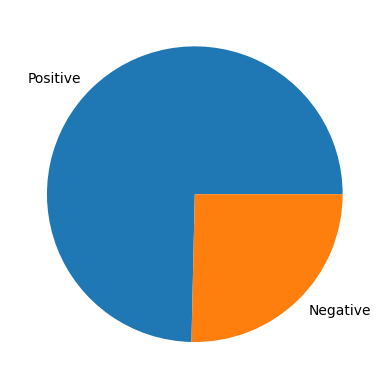

In [42]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels=['Positive','Negative'])
plt.show()

### SMOTE (Handle imbalanced dataset)

In [43]:
!pip install imbalanced-learn

In [44]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
vectorized_xtrain_smote,y_train_smote=smote.fit_resample(vectorized_xtrain,y_train)
print(vectorized_xtrain_smote,y_train_smote.shape)

[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.8825994 0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]] (9458,)


In [45]:
y_train_smote.value_counts()

label
0    4729
1    4729
Name: count, dtype: int64

In [46]:
vectorized_xtrain_smote

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.8825994, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [47]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9453    1
9454    1
9455    1
9456    1
9457    1
Name: label, Length: 9458, dtype: int64

In [48]:
vectorized_xtest

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [49]:
y_test

4061    1
6899    0
3579    0
814     0
4323    0
       ..
1916    0
154     0
2339    0
7846    0
6038    0
Name: label, Length: 1584, dtype: int64

### Model Training and Evaluation

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [51]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy={acc}\n\tPrecision = {pr}\n\tRecall ={rec}\n\tF1-score ={f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy={acc}\n\tPrecision = {pr}\n\tRecall ={rec}\n\tF1-score ={f1}')

## Logistic Regression

In [52]:
lr=LogisticRegression()
lr.fit(vectorized_xtrain_smote,y_train_smote)

y_train_pred=lr.predict(vectorized_xtrain_smote)

y_test_pred=lr.predict(vectorized_xtest)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy=0.937
	Precision = 0.913
	Recall =0.967
	F1-score =0.939
Testing Scores:
	Accuracy=0.872
	Precision = 0.715
	Recall =0.857
	F1-score =0.78


## Naive Bayes


In [53]:
mnb=MultinomialNB()
mnb.fit(vectorized_xtrain_smote,y_train_smote)

y_train_pred=mnb.predict(vectorized_xtrain_smote)

y_test_pred=mnb.predict(vectorized_xtest)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy=0.906
	Precision = 0.871
	Recall =0.954
	F1-score =0.91
Testing Scores:
	Accuracy=0.871
	Precision = 0.692
	Recall =0.926
	F1-score =0.792


## Decision Tree

In [54]:
dt=DecisionTreeClassifier()
dt.fit(vectorized_xtrain_smote,y_train_smote)

y_train_pred=dt.predict(vectorized_xtrain_smote)

y_test_pred=dt.predict(vectorized_xtest)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy=1.0
	Precision = 1.0
	Recall =0.999
	F1-score =1.0
Testing Scores:
	Accuracy=0.838
	Precision = 0.705
	Recall =0.668
	F1-score =0.686


## Random Forest

In [55]:
rf=RandomForestClassifier()
rf.fit(vectorized_xtrain_smote,y_train_smote)

y_train_pred=rf.predict(vectorized_xtrain_smote)

y_test_pred=rf.predict(vectorized_xtest)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy=1.0
	Precision = 0.999
	Recall =1.0
	F1-score =1.0
Testing Scores:
	Accuracy=0.86
	Precision = 0.759
	Recall =0.69
	F1-score =0.722


## Support Vector Machine

In [56]:
svm=SVC()
svm.fit(vectorized_xtrain_smote,y_train_smote)

y_train_pred=svm.predict(vectorized_xtrain_smote)

y_test_pred=svm.predict(vectorized_xtest)

training_scores(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy=0.978
	Precision = 0.962
	Recall =0.996
	F1-score =0.978
Testing Scores:
	Accuracy=0.881
	Precision = 0.761
	Recall =0.804
	F1-score =0.782


### Save and Load


In [57]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)